Recovered Decay (b): 0.860 (True value is approx 1.0)
Recovered Freq (w):  1.922 (True value is approx 2.0)


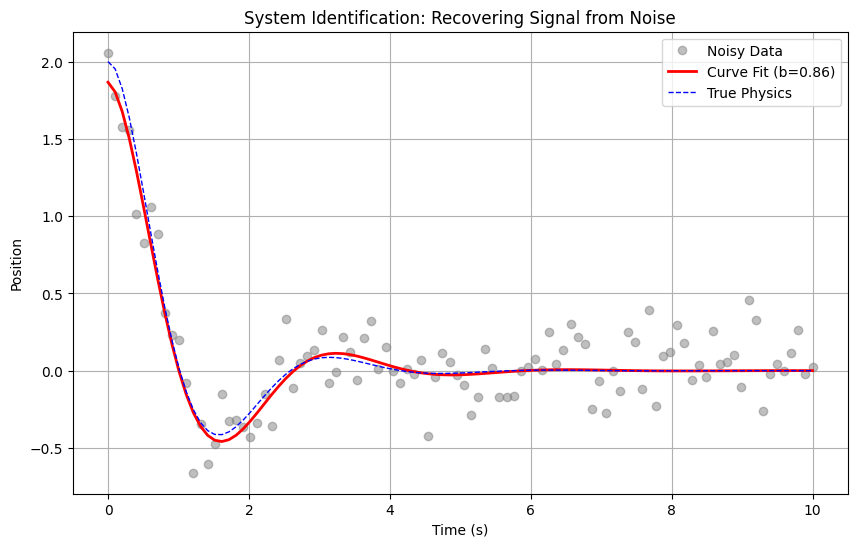

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

# 1. THE PHYSICS (ODE)
def model(c_state, t):
    x = c_state[0]
    v = c_state[1]
    # Equation: y'' + 2y' + 5y = 0  ->  a = -2v - 5x
    a = -2*v - 5*x 
    return [v, a]

# Setup Simulation
initial = [2, 0] # Start at x=2, v=0
t = np.linspace(0, 10, 100)

# Solve ODE
sol = odeint(model, initial, t)
clean_data = sol[:, 0] # Extract Position column

# 2. ADD NOISE (Simulate Real World)
# Gaussian noise with standard deviation of 0.2
noise = np.random.normal(0, 0.2, len(t))
noisy_data = clean_data + noise

# 3. THE CURVE FIT (Recovering the Logic)
# Define the shape we expect (Decaying Cosine)
def target_func(t, A, b, w, phi):
    return A * np.exp(-b * t) * np.cos(w * t + phi)

# Initial guess to help the solver [Amp, Decay, Freq, Phase]
p0 = [2.0, 0.5, 2.0, 0.0]

# Fit to the NOISY data
popt, pcov = curve_fit(target_func, t, noisy_data, p0=p0)
A_fit, b_fit, w_fit, phi_fit = popt

# Generate the smooth fitted line using the calculated parameters
fitted_curve = target_func(t, *popt)

print(f"Recovered Decay (b): {b_fit:.3f} (True value is approx 1.0)")
print(f"Recovered Freq (w):  {w_fit:.3f} (True value is approx 2.0)")

# 4. PLOTTING
plt.figure(figsize=(10, 6))

# Plot the messy "Sensor" data
plt.plot(t, noisy_data, 'o', color='gray', alpha=0.5, label='Noisy Data')

# Plot the Curve Fit found by Python
plt.plot(t, fitted_curve, 'r-', linewidth=2, label=f'Curve Fit (b={b_fit:.2f})')

# Plot the original clean physics (just to compare)
plt.plot(t, clean_data, 'b--', linewidth=1, label='True Physics')

plt.title('System Identification: Recovering Signal from Noise')
plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.legend()
plt.grid(True)
plt.show()